# Simple Linear Model and Evaluation Metric

ถ้าลองนึกภาพตามง่ายๆในมุมมองของผู้สร้างโมเดล เราอาจจะสร้างโมเดลที่มีความซับซ้อนมากๆและทำนายชุดข้อมูลที่เรามีได้ดีมาก หรืออาจจะสร้างโมเดลที่ซับซ้อนน้อยลงมาหน่อยแต่ก็ยังทำนายชุดข้อมูลที่เรามีได้ดีรองลงมาก็ได้ ตัวเลือกในการสร้างโมเดลมีหลากหลายรูปแบบ แต่ว่าเราจะเลือกโมเดลที่เหมาะสมได้อย่างไร?

ในบทเรียนนี้เราจะลองสร้างโมเดลทำนายชุดข้อมูลในรูปแบบต่างๆ และดูกันว่าโมเดลแบบใดจะเหมาะสมกับชุดข้อมูลตัวอย่างของเรา

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<iframe width="560" height="315" src="https://www.youtube.com/embed/NCF1cqLCW84" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

โมเดลเชิงเส้น (Linear Model)
---
กำหนดให้สมการความสัมพันธ์ระหว่าง x และ y ที่แท้จริง เป็นสมการเชิงเส้น $y = w_0 + w_1x$ โดยที่ $w_0$ คือค่าจุดตัดแกน y และ $w_1$ คือค่าความชันของเส้นตรง 

ในการเก็บข้อมูลจริงมักมีสัญญาณรบกวน (noise) ที่มาจากหลายปัจจัย เช่น ความไม่เสถียรของเครื่องมือเก็บข้อมูล คลื่นไฟฟ้ากระแสสลับที่ใช้ในประเทศ ในกรณีที่เก็บข้อมูลผ่านอุปกรณ์อิเล็กทรอนิคส์ ปัจจัยเหล่านี้ส่งผลให้ข้อมูลที่เก็บมานั้นมีค่าที่แตกต่างไปจากความสัมพันธ์ที่แท้จริง ซึ่งสามารถเขียนอธิบายได้ด้วยสมการ $y = w_0 + w_1x + noise$


ในส่วนนี้เราจะลองทดลองเลียนแบบกระบวนการเก็บข้อมูลผ่านการเรียกใช้ `generate_sample_linear`

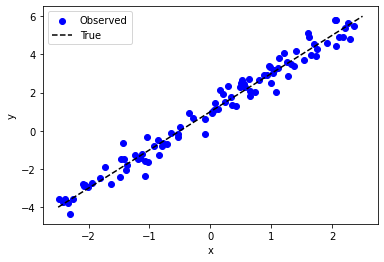

In [2]:
def generate_sample_linear(x, w0=1, w1=2, include_noise=True):
  # สร้างสมการเส้นตรงโดยที่จำลองการใส่สัญญาณรบกวนเข้าไป
  # เลือก include_noise เป็น True เพื่อกำหนดให้มีค่า noise เพิ่มเข้าไปในสมการ
  if include_noise:
    noise = 0.20 * np.max(x) * np.random.randn(*x.shape)
  else:
    noise = 0
  y = w0 + (w1 * x) + noise
  return y

# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_sample_linear
num_samples = 100
w0_true, w1_true = 1, 2
x = 5 * np.random.rand(num_samples, 1) - 2.5 # สุ่มค่า x จากพิสัย -2.5 ถึง 2.5
y = generate_sample_linear(x, w0_true, w1_true, include_noise=True)

# สร้างข้อมูลที่ไม่มีสัญญาณรบกวนมาเปรียบเทียบ
y_true = generate_sample_linear(x, w0_true, w1_true, include_noise=False)

# สร้างข้อมูลที่ไม่มีสัญญาณรบกวนมาแบบละเอียด เพื่อใช้ในการวาดกราฟ (เส้นประสีดำ)
x_whole_line = np.linspace(-2.5, 2.5, 100)
y_true_whole_line = generate_sample_linear(x_whole_line, w0_true, w1_true, include_noise=False) 

# Plot ข้อมูล x, y ที่มีอยู่
fig, ax = plt.subplots()
ax.scatter(x, y, c='b', label='Observed')
ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')
ax.set(xlabel='x', ylabel='y')
ax.legend()
plt.show()


กำหนดให้เรามีจำนวนข้อมูลทั้งหมด $n$ จุด $(x_1,y_1), (x_2,y_2), ..., (x_i,y_i),.., (x_n,y_n)$

หากเราพิจารณาภาพความสัมพันธ์ระหว่าง $x$ กับ $y$ จากการรันโค้ดด้านบน จะพบว่ามีลักษณะเป็นเส้นตรง ดังนั้นเราจะทดลองใช้โมเดลที่เป็นสมการเชิงเส้น $\hat{y_i}=\hat{w_0} + \hat{w_1} x_i$ 


เราสามารถหาค่า $\hat{w_0},$ และ $\hat{w_1},$ ของโมเดลจากข้อมูล x และ y ที่เรามีอยู่ได้โดยการแก้สมการต่อไปนี้

$$
\min_{\hat{w_{0}},\hat{w_{1}}}L(y_{i},\hat{y_i})
=\min_{\hat{w_{0}},\hat{w_{1}}}\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2} 
= \min_{\hat{w_{0}},\hat{w_{1}}}\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-(\hat{w_{0}}+\hat{w_{1}}x_{i})\right)^{2}
$$

ผ่านการเรียกใช้ `LinearRegression` จากไลบรารี่ `scikit-learn`

---
โดยทั่วไปแล้ว เรามักใช้ฟังก์ชัน $L(y_{i},\hat{y_i})$ สำหรับวัดความเหมือนหรือความต่างระหว่าง $y_{i}$ และ $\hat{y_i}$ ออกมาเป็นตัวเลข 1 ตัว 

ในตัวอย่างนี้เรากำหนดให้ $L(y_{i},\hat{y_i}) =\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}$ ซึ่งเป็นการวัดความแตกต่างระหว่าง $y_{i}$ และ $\hat{y_i}$ ออกมาเป็นค่าค่าหนึ่ง 

*   ถ้าค่านั้นมีค่าน้อย แสดงว่า $y_{i}$ กับ $\hat{y_i}$ มีความแตกต่างกันน้อย
*   ถ้าค่านั้นมีค่ามาก แสดงว่า $y_{i}$ และ $\hat{y_i}$ มีความแตกต่างกันมาก

ในหลายๆ ครั้ง เราจะแก้ปัญหา $\min_{\hat{w_{0}},\hat{w_{1}}} L(y_{i},\hat{y_i})$ ซึ่งหมายถึงการหาค่าต่ำสุดของ $L(y_{i},\hat{y_i})$ โดยการปรับค่า $\hat{w_{0}}$ และ $\hat{w_{1}}$ ไปจนกว่า $L(y_{i},\hat{y_i})$ จะมีค่าน้อยที่สุด เราจึงมักเรียก $L(y_{i},\hat{y_i})$ ว่า loss function (หรือเราพยายามลดค่าความสูญเสีย หรือ loss นั่นเอง)

In [3]:
model_linear = LinearRegression()

# ให้โมเดลหาค่า w_0 and w_1 จากข้อมูล (x,y) ทั้งหมดที่มี
model_linear.fit(x, y)

w0_hat = model_linear.intercept_[0]
w1_hat = model_linear.coef_[0][0]

print(f"True slope {w1_true:0.2f}")
print(f"Estimated slope {w1_hat:0.2f}\n")
print(f"True intercept {w0_true:0.2f}")
print(f"Estimated intercept {w0_hat:0.2f}")

True slope 2.00
Estimated slope 1.98

True intercept 1.00
Estimated intercept 1.03


จะเห็นว่าความชันและจุดตัดแกน y ที่ประมาณจากโมเดล linear regression มีค่าใกล้กับค่าที่เรากำหนดมาตอนสุ่มชุดข้อมูล

หลังจากที่เรา fit โมเดลแล้ว (โมเดลได้ทำการประมาณค่า $\hat{w_0}$ และ $\hat{w_1}$ เรียบร้อยแล้ว) เราสามารถทำนายค่า y จาก $x_i$ ใดๆ ได้จากสมการ $ \hat{y_i} = \hat{w_0} + \hat{w_1}x_i$ ได้โดยตรง หรือผ่านการเรียกใช้ฟังก์ชัน `predict` ได้เช่นกัน

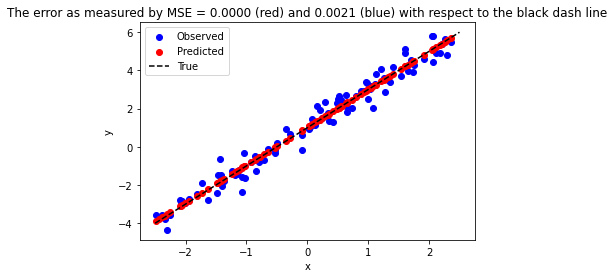

In [4]:
# ใช้โมเดลทำนายค่า y จากค่า x วิธีที่ 1
y_hat = w0_hat + w1_hat*x

# ใช้โมเดลทำนายค่า y จากค่า x วิธีที่ 2
# y_hat = model_linear.predict(x)

# วัด mean squared error จากการทำนาย
def mse(y,y_hat):
  return np.mean((y-y_hat)**2)/y.shape[0]

mse_val = mse(y_true, y_hat)
mse_val_noisy = mse(y_true, y)

# แสดงผลการทำนาย
fig, ax = plt.subplots()
ax.scatter(x, y, c='b', label='Observed')
ax.set(xlabel='x', ylabel='y')
ax.scatter(x, y_hat, c='r', label='Predicted')
ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')
ax.legend()
ax.set_title(f"The error as measured by MSE = {mse_val:0.4f} (red) and {mse_val_noisy:0.4f} (blue) with respect to the black dash line")
plt.show()

จากการสังเกตด้วยตา จะเห็นว่าค่า y ที่โมเดลได้ทำนายออกมา (จุดสีแดง) มีความสอดคล้องกับความสัมพันธ์ระหว่าง x และ y ที่แท้จริง (เส้นประสีดำ) มากกว่าข้อมูลที่เราเก็บมาเสียอีก (จุดสีน้ำเงิน)

นอกจากการสังเกตด้วยตาแล้ว ในหลายสถานการณ์ การสรุปความเหมือนหรือความแตกต่างออกมาเป็นตัวเลข 1 ตัว ก็มีประโยชน์ต่อการสื่อสารกับผู้อื่นเช่นกัน

ตัวอย่างด้านบนใช้การวัดความแตกต่างโดยใช้ฟังก์ชันที่มีชื่อว่า mean squared error (MSE) หากเรามีข้อมูลอยู่สองชุด
(1) $y_1, y_2, ..., y_n$
และ
(2) $\hat{y_1}, \hat{y_2}, ..., \hat{y_n}$

เราสามารถคำนวณค่า MSE ระหว่างข้อมูลสองชุดนี้ผ่านสมการด้านล่าง

$$
MSE(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}
$$

โดยถ้า $y_i$ มีค่าใกล้เคียงกับ $\hat{y_i}$ สำหรับทุกค่า $i$ จะมีค่า MSE น้อย
ในทางกลับกัน ถ้า $y_i$ มีค่าแตกต่างจาก $\hat{y_i}$ มาก สำหรับทุกค่า $i$ จะส่งผลให้มี MSE ที่สูง

MSE เป็นแค่หนึ่งในวิธีสำหรับวัดผล (evaluation metric) เท่านั้น ยังมีอีกหลายวิธีที่ใช้วัดผลออกมาเป็นตัวเลข เช่น mean absolution error (MAE), accuracy, F-score ฯลฯ ซึ่ง evaluation metric แต่ละอัน วัดค่าความเหมือนหรือความแตกต่างด้วยการใช้มาตรวัดคนละตัว ซึ่งมีเหมาะกับสถานการณ์ที่แตกต่างกัน

ใน module นี้ เราจะใช้ MSE เป็น evaluation metric ไปก่อน แต่ใน module ถัดๆ ไป เราจะได้เห็น evaluation metric ที่หลากหลายมากยิ่งขึ้น